In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

### R-Square / Koefisien Determinasi
- Besar pengaruh x terhadap y
- Menunjukkan kecocokan model

### Adjusted R-Square
- Mempertimbangkan degree of freedom, biasanya jumlah sampel - 1

## Model Diagnostics

### 1. Uji F
- Menguji signifikansi dari model multiple regression
    - H0 : B1 = B2 = ... = Bn
    - H1 : Tidak semua B bernilai 0

### 2. Uji T
- Menguji signifikansi hubungan antara variabel Y dengan X
    - H0 : Bi = 0
    - H1 : Bi != 0

### Dummy Variable
- Variabel kategorikal / kualitatif pada model regresi yang tidak dapat digunakan karena tidak numerikal
- Variabel kategorikal digantikan dengan dummy variable

### Interaction Variable
- Interaksi antara variabel kuantitatif dan kualitatif

## Contoh 1

In [3]:
boston = load_boston()

In [4]:
data = pd.DataFrame(boston['data'], columns=boston['feature_names'])
target = pd.Series(boston['target'])

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 101)
x_train1, x_test1, y_train1, y_test1 = train_test_split(data, target, test_size=0.3, random_state = 150)

In [12]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
86,0.05188,0.0,4.49,0.0,0.4490,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86
241,0.10612,30.0,4.93,0.0,0.4280,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40


In [13]:
x_train1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
201,0.03445,82.5,2.03,0.0,0.415,6.162,38.4,6.2700,2.0,348.0,14.7,393.77,7.43
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84
337,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13


In [14]:
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
434,13.91340,0.0,18.10,0.0,0.713,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32


In [15]:
x_test1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
114,0.14231,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,378.35,11.65
119,0.14476,0.0,10.01,0.0,0.547,5.731,65.2,2.7592,6.0,432.0,17.8,391.50,13.61
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34


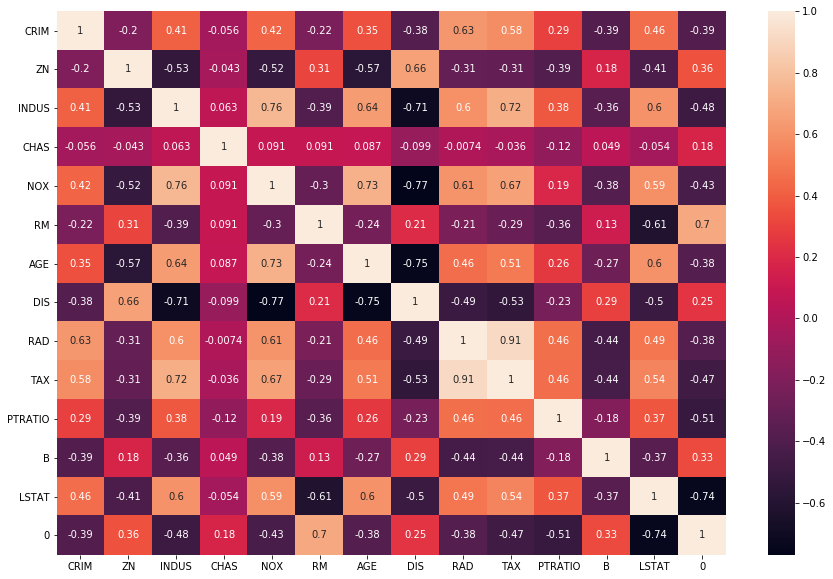

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.concat([data,target],axis=1).corr(),annot=True)

In [17]:
from statsmodels.api import OLS
linear = OLS(y_train, sm.add_constant(x_train))

In [18]:
hasil = linear.fit()
hasil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     77.27
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.52e-93
Time:                        19:53:57   Log-Likelihood:                -1027.8
No. Observations:                 354   AIC:                             2084.
Df Residuals:                     340   BIC:                             2138.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.2189      5.792      6.944      0.000      28.826      51.611
CRIM          -0.0885      0.039     -2.291      0.023      -0.164      -0.013
ZN             0.0503      0.017      2.954      0.003       0.017       0.084
INDUS          0.0203      0.065      0.312      0.755      -0.108       0.149
CHAS           3.7543      0.992      3.784      0.000       1.803       5.706
NOX          -17.7484      4.261     -4.165      0.000     -26.129      -9.367
RM             3.2478      0.491      6.615      0.000       2.282       4.213
AGE            0.0120      0.015      0.805      0.421      -0.017       0.041
DIS           -1.4092      0.229     -6.165      0.000      -1.859      -0.960
RAD            0.2639      0.070      3.747      0.000       0.125       0.402
TAX           -0.0103      0.004     -2.661      0.008      -0.018      -0.003
PTRATIO       -0.9518      0.150     -6.341      0.000      -1.247      -0.657
B              0.0061      0.003      1.997      0.047    9.21e-05       0.012
LSTAT         -0.5971      0.061     -9.848      0.000      -0.716      -0.478
==============================================================================
Omnibus:                      149.127   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              744.569
Skew:                           1.739   Prob(JB):                    2.08e-162
Kurtosis:                       9.196   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
xtrain_new = x_train[['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','B','LSTAT']]
xtest_new = x_train[['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','B','LSTAT']]

In [24]:
linear1 = OLS(y_train, sm.add_constant(xtrain_new))
hasil1 = linear1.fit()
hasil1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     86.89
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.97e-88
Time:                        20:05:10   Log-Likelihood:                -1047.8
No. Observations:                 354   AIC:                             2118.
Df Residuals:                     343   BIC:                             2160.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3521      4.906      3.740      0.000       8.702      28.002
CRIM          -0.0839      0.041     -2.064      0.040      -0.164      -0.004
ZN             0.0843      0.017      5.027      0.000       0.051       0.117
CHAS           4.4910      1.027      4.371      0.000       2.470       6.512
NOX           -8.8103      3.952     -2.229      0.026     -16.584      -1.037
RM             3.7404      0.498      7.503      0.000       2.760       4.721
DIS           -1.5539      0.223     -6.957      0.000      -1.993      -1.115
RAD            0.1901      0.071      2.695      0.007       0.051       0.329
TAX           -0.0136      0.004     -3.721      0.000      -0.021      -0.006
B              0.0056      0.003      1.728      0.085      -0.001       0.012
LSTAT         -0.6212      0.059    -10.467      0.000      -0.738      -0.504
==============================================================================
Omnibus:                      138.973   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              566.595
Skew:                           1.685   Prob(JB):                    9.24e-124
Kurtosis:                       8.201   Cond. No.                     1.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(xtrain_new, y_train)
prediksi = lm.predict(xtest_new)
prediksi

array([42.87882577, 36.9327941 , 21.38481077, 21.42585677, 21.59436589,
       12.05252044, 22.39296296, 26.08031307, 21.3226241 , 29.58180381,
       40.38102237, 24.36516013, 25.69600207, 23.32156878, 15.22593443,
       29.7731797 , 18.39537533, 12.83297724, 19.95723041, 31.3805731 ,
       34.09568358, 23.36998871,  0.70205965, 18.03737734, 27.35611984,
       18.3792753 , 25.33879179, 25.70116216, 26.15947395, 22.21826968,
       25.6701114 , 37.06156521, 23.5051032 , 35.96236405, 24.01913185,
       16.45602504, 20.97511914, 16.43283569, 25.05251931, 37.14751911,
        7.35136972, 19.35886452, 19.42527546, 26.64284987, 25.44328999,
       17.64630207, 20.02217286, 31.91221793, 21.10203401, 20.26321709,
       29.23107254, 27.26554653, 15.51260918, 18.04058091, 17.30543071,
       18.37818298, 29.58554004, 20.11134487, 18.73579854, 16.17034385,
       32.30618707, 17.00164607, 21.26770283, 22.99549839, 36.39814758,
       17.8204926 , 34.94910807, 17.31175704, 11.69290249, -4.26

In [26]:
error = []
for i, j in zip(prediksi, y_test):
    error.append([i, j, abs(i-j), (abs(i-j)/j)*100])

In [27]:
data_error = pd.DataFrame(error, columns = ['Prediksi', 'Nilai Asli', 'Nilai Error', '% Error'])

In [28]:
data_error.head()

,Prediksi,Nilai Asli,Nilai Error,% Error
0,42.878826,50.0,7.121174,14.242348
1,36.932794,36.2,0.732794,2.024293
2,21.384811,11.7,9.684811,82.776160
3,21.425857,14.9,6.525857,43.797696
4,21.594366,30.8,9.205634,29.888422


In [29]:
y_test.head()

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
dtype: float64

In [30]:
np.mean(data_error['% Error'])

47.55178108671545

In [33]:
linear1 = OLS(y_train1, sm.add_constant(x_train1))
hasil1 = linear1.fit()
hasil1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     80.05
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.27e-95
Time:                        20:23:48   Log-Likelihood:                -1064.0
No. Observations:                 354   AIC:                             2156.
Df Residuals:                     340   BIC:                             2210.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0631      6.617      6.054      0.000      27.047      53.079
CRIM          -0.1025      0.037     -2.784      0.006      -0.175      -0.030
ZN             0.0526      0.017      3.109      0.002       0.019       0.086
INDUS          0.0158      0.082      0.193      0.847      -0.145       0.177
CHAS           3.3317      1.040      3.205      0.001       1.287       5.377
NOX          -21.0948      4.776     -4.417      0.000     -30.489     -11.701
RM             3.7160      0.529      7.022      0.000       2.675       4.757
AGE            0.0067      0.016      0.411      0.681      -0.025       0.038
DIS           -1.6718      0.259     -6.448      0.000      -2.182      -1.162
RAD            0.3349      0.085      3.950      0.000       0.168       0.502
TAX           -0.0109      0.005     -2.203      0.028      -0.021      -0.001
PTRATIO       -1.0204      0.160     -6.361      0.000      -1.336      -0.705
B              0.0109      0.003      3.183      0.002       0.004       0.018
LSTAT         -0.5851      0.063     -9.237      0.000      -0.710      -0.460
==============================================================================
Omnibus:                      103.236   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.962
Skew:                           1.277   Prob(JB):                     1.67e-76
Kurtosis:                       7.140   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
xtrain_new1 = x_train1[['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','LSTAT', 'B']]
xtest_new1 = x_test1[['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','LSTAT', 'B']]

In [35]:
linear1 = OLS(y_train1, sm.add_constant(xtrain_new1))
hasil1 = linear1.fit()
hasil1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     90.16
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.08e-89
Time:                        20:24:58   Log-Likelihood:                -1083.9
No. Observations:                 354   AIC:                             2190.
Df Residuals:                     343   BIC:                             2232.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9807      5.591      2.679      0.008       3.983      25.978
CRIM          -0.0950      0.039     -2.452      0.015      -0.171      -0.019
ZN             0.0865      0.016      5.296      0.000       0.054       0.119
CHAS           3.8107      1.082      3.523      0.000       1.683       5.938
NOX          -11.4298      4.530     -2.523      0.012     -20.341      -2.519
RM             4.4059      0.531      8.298      0.000       3.362       5.450
DIS           -1.8098      0.251     -7.196      0.000      -2.304      -1.315
RAD            0.2567      0.082      3.112      0.002       0.094       0.419
TAX           -0.0151      0.004     -3.453      0.001      -0.024      -0.007
LSTAT         -0.6055      0.062     -9.704      0.000      -0.728      -0.483
B              0.0108      0.004      3.009      0.003       0.004       0.018
==============================================================================
Omnibus:                       90.308   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.881
Skew:                           1.138   Prob(JB):                     6.17e-62
Kurtosis:                       6.733   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
lm1 = LinearRegression()
lm1.fit(xtrain_new1, y_train1)
prediksi1 = lm1.predict (xtest_new1)
prediksi1

array([25.04975418, 25.64748805, 23.3051913 , 19.9517926 , 15.47304554,
       28.8238684 , 18.21936634,  9.6762883 , 22.93633112, 20.28403281,
       13.48325028, 19.54158196, 21.73723432, 25.3324128 , 24.95742248,
       23.47648712, 26.2511437 , 20.31545322, 19.04302958, 24.15281588,
       20.46799705, 26.10367779, 27.89011007, 18.98055425, 12.33499381,
       23.49577215, 24.45805404, 15.45002683, 25.63632405, 26.21144051,
        6.47474036, 30.27787865, 18.41162032, 34.83294359, 19.36538374,
       27.38045501, 22.12232128, 18.64409786, 28.99266909, 19.54976981,
       12.53656743, -0.46417247, 22.17703113, 32.92375825, 35.45279708,
       24.78312428, 24.88513868, 25.92533498, 19.4051775 , 23.21672125,
       33.46843283,  5.80459054, 19.39029779, 21.84329912, 31.67559451,
        9.63642039,  7.75714892, 26.57219878, 22.41931612, 15.4845334 ,
       32.22383439, 28.75447594, 24.82542272, 19.16893443, 27.07359924,
       34.10245867, 31.54438912,  5.05712674, 26.75181283, 21.50

In [37]:
error1 = []
for i, j in zip (prediksi1, y_test) :
    error1.append([i, j, abs(i-j), (abs(i-j)/j)*100])
data_error1 = pd.DataFrame (error1, columns = ['Prediksi', ' Nilai Asli', 'Nilai Error', '% Error'])
data_error1.head(10)

,Prediksi,Nilai Asli,Nilai Error,% Error
0,25.049754,50.0,24.950246,49.900492
1,25.647488,36.2,10.552512,29.150585
2,23.305191,11.7,11.605191,99.189669
3,19.951793,14.9,5.051793,33.904648
4,15.473046,30.8,15.326954,49.762839
5,28.823868,36.1,7.276132,20.155489
6,18.219366,50.0,31.780634,63.561267
7,9.676288,13.2,3.523712,26.694786
8,22.936331,41.3,18.363669,44.464089
9,20.284033,8.5,11.784033,138.635680


In [38]:
MAPE = {'MAPE 1' : [np.mean(data_error['% Error'])],
       'MAPE 2' : [np.mean(data_error1['% Error'])]}

In [39]:
df_error = pd.DataFrame (MAPE)
df_error

,MAPE 1,MAPE 2
0,47.551781,51.029976


## Latihan

In [127]:
auction = pd.read_csv('auction.csv')

In [128]:
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [129]:
auction.isnull().sum()

auctionid        0
bid              0
bidtime          0
bidder          16
bidderrate      11
openbid          0
price            0
item             0
auction_type     0
dtype: int64

In [130]:
auction.dropna(inplace=True)

In [131]:
y = pd.Series(auction['bid'])

In [132]:
auction.drop(['auctionid','bid','bidder','item','auction_type'],axis=1,inplace=True)

In [133]:
x_train, x_test, y_train, y_test = train_test_split(auction, y, test_size=0.2, random_state = 101)

In [134]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(auction, y, test_size=0.2, random_state = 201)

In [135]:
x_train.head()

,bidtime,bidderrate,openbid,price
3602,4.626590,0.0,99.99,212.0
1581,4.711262,50.0,1.00,390.0
6089,6.999980,7.0,0.01,232.5
893,1.911875,102.0,200.00,450.0
6545,1.862160,14.0,0.01,207.5


In [136]:
x_test.head()

,bidtime,bidderrate,openbid,price
7866,6.607990,3.0,9.99,232.5
103,2.973032,3.0,100.00,326.0
1081,6.693646,0.0,700.00,841.0
9101,6.986771,2.0,75.00,125.0
8954,4.812859,6.0,24.50,126.0


In [137]:
y_train.head()

3602    185.0
1581    206.0
6089    232.5
893     200.0
6545    150.0
Name: bid, dtype: float64

In [138]:
y_test.head()

7866    225.0
103     182.0
1081    710.0
9101    100.0
8954     60.0
Name: bid, dtype: float64

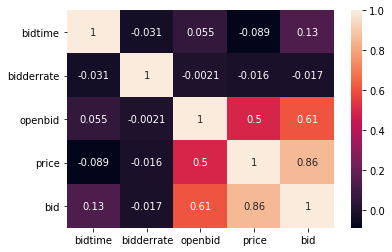

In [139]:
sns.heatmap(pd.concat([auction,y],axis=1).corr(),annot=True)

### Model 1

In [140]:
lin = OLS(y_train, sm.add_constant(x_train))
res = lin.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bid   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     9431.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:54:54   Log-Likelihood:                -54107.
No. Observations:                8523   AIC:                         1.082e+05
Df Residuals:                    8518   BIC:                         1.083e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -112.1697      3.330    -33.680      0.000    -118.698    -105.641
bidtime       26.2092      0.644     40.683      0.000      24.946      27.472
bidderrate    -0.0046      0.013     -0.361      0.718      -0.030       0.020
openbid        0.4057      0.011     38.580      0.000       0.385       0.426
price          0.5818      0.004    143.468      0.000       0.574       0.590
==============================================================================
Omnibus:                     3459.796   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           252912.562
Skew:                          -1.080   Prob(JB):                         0.00
Kurtosis:                      29.599   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
xtrain_new = x_train[['bidtime','openbid','price']]
xtest_new = x_train[['bidtime','openbid','price']]

In [142]:
linear1 = OLS(y_train, sm.add_constant(xtrain_new))
hasil1 = linear1.fit()
hasil1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bid   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:56:18   Log-Likelihood:                -54107.
No. Observations:                8523   AIC:                         1.082e+05
Df Residuals:                    8519   BIC:                         1.083e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -112.3503      3.293    -34.123      0.000    -118.805    -105.896
bidtime       26.2156      0.644     40.710      0.000      24.953      27.478
openbid        0.4056      0.011     38.581      0.000       0.385       0.426
price          0.5818      0.004    143.511      0.000       0.574       0.590
==============================================================================
Omnibus:                     3460.461   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           252906.617
Skew:                          -1.080   Prob(JB):                         0.00
Kurtosis:                      29.599   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
lm = LinearRegression()
lm.fit(xtrain_new, y_train)
prediksi = lm.predict(xtest_new)
prediksi

array([172.84469444, 238.47445039, 206.43583866, ...,  44.73921661,
       318.1956375 , 383.06943506])

In [144]:
error = []
for i, j in zip(prediksi, y_test):
    error.append([i, j, abs(i-j), (abs(i-j)/j)*100])

In [145]:
data_error = pd.DataFrame(error, columns = ['Prediksi', 'Nilai Asli', 'Nilai Error', '% Error'])

In [149]:
data_error.head()

,Prediksi,Nilai Asli,Nilai Error,% Error
0,172.844694,225.0,52.155306,23.180136
1,238.474450,182.0,56.474450,31.029918
2,206.435839,710.0,503.564161,70.924530
3,280.718825,100.0,180.718825,180.718825
4,57.199470,60.0,2.800530,4.667549


In [147]:
np.mean(data_error['% Error'])

2515.0774541088103

### Model 2

In [150]:
linear1 = OLS(y_train1, sm.add_constant(x_train1))
hasil1 = linear1.fit()
hasil1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bid   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:59:20   Log-Likelihood:                -53896.
No. Observations:                8523   AIC:                         1.078e+05
Df Residuals:                    8518   BIC:                         1.078e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -111.0149      3.248    -34.178      0.000    -117.382    -104.648
bidtime       25.7366      0.629     40.923      0.000      24.504      26.969
bidderrate     0.0025      0.012      0.205      0.838      -0.021       0.026
openbid        0.4055      0.010     41.796      0.000       0.386       0.424
price          0.5851      0.004    148.038      0.000       0.577       0.593
==============================================================================
Omnibus:                     3204.323   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244447.633
Skew:                          -0.920   Prob(JB):                         0.00
Kurtosis:                      29.172   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
xtrain_new1 = x_train1[['bidtime','openbid','price']]
xtest_new1 = x_train1[['bidtime','openbid','price']]

In [155]:
linear1 = OLS(y_train1, sm.add_constant(xtrain_new1))
hasil1 = linear1.fit()
hasil1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bid   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 1.395e+04
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:01:05   Log-Likelihood:                -53896.
No. Observations:                8523   AIC:                         1.078e+05
Df Residuals:                    8519   BIC:                         1.078e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -110.9138      3.210    -34.551      0.000    -117.207    -104.621
bidtime       25.7319      0.628     40.945      0.000      24.500      26.964
openbid        0.4055      0.010     41.803      0.000       0.386       0.425
price          0.5851      0.004    148.074      0.000       0.577       0.593
==============================================================================
Omnibus:                     3203.902   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244420.460
Skew:                          -0.920   Prob(JB):                         0.00
Kurtosis:                      29.170   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
lm1 = LinearRegression()
lm1.fit(xtrain_new1, y_train1)
prediksi1 = lm1.predict (xtest_new1)
prediksi1

array([186.64276996, 995.67829461, 843.35122173, ...,  68.40448194,
       186.23279267,  91.79189676])

In [157]:
error1 = []
for i, j in zip (prediksi1, y_test) :
    error1.append([i, j, abs(i-j), (abs(i-j)/j)*100])
data_error1 = pd.DataFrame (error1, columns = ['Prediksi', ' Nilai Asli', 'Nilai Error', '% Error'])
data_error1.head()

,Prediksi,Nilai Asli,Nilai Error,% Error
0,186.642770,225.0,38.357230,17.047658
1,995.678295,182.0,813.678295,447.075986
2,843.351222,710.0,133.351222,18.781862
3,-23.485579,100.0,123.485579,123.485579
4,160.647119,60.0,100.647119,167.745198


In [158]:
MAPE = {'MAPE 1' : [np.mean(data_error['% Error'])],
       'MAPE 2' : [np.mean(data_error1['% Error'])]}

In [159]:
df_error = pd.DataFrame (MAPE)
df_error

,MAPE 1,MAPE 2
0,2515.077454,3856.273035


## Contoh 2

In [160]:
tips = sns.load_dataset('tips')

In [161]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [163]:
tips = pd.get_dummies(tips, drop_first = True, columns = ['sex', 'smoker', 'day', 'time'])

In [164]:
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


## Multi-Collinearity

### Variance Inflation Factor (VIF)
- VIF > 4 : tidak dapat diterima
- VIF > 10 : multi-kolinearitas tinggi 

## Contoh 3

In [166]:
# Normalitas Residu
hasil.resid

288   -4.231183
72    -1.545829
471   -3.055810
176   -1.979156
320   -0.950603
         ...   
63     2.741107
326   -0.609076
337   -0.452495
11    -2.093928
351    3.584837
Length: 404, dtype: float64

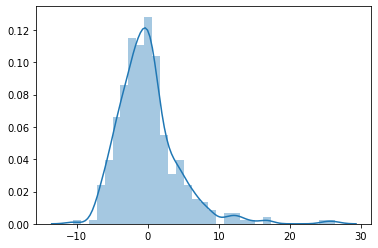

In [167]:
sns.distplot(hasil.resid)

In [171]:
from scipy.stats import kstest
kstest(hasil.resid, 'norm')

KstestResult(statistic=0.3251022467406128, pvalue=1.6336463825085057e-38)

In [176]:
# Uji Homoskedastisitas
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

nama = ['F Stat', 'P-Value']
test = sms.het_goldfeldquandt(hasil.resid, hasil.model.exog)
lzip(nama,test)

[('F Stat', 0.8693629860268316), ('P-Value', 0.8309909003697011)]

In [178]:
# Uji Autokorelasi
from statsmodels.stats import diagnostic

# p-value > alpha : gagal menolak H0
# H0 : tidak ada autokorelasi
# H1 : terjadi korelasi

diagnostic.acorr_ljungbox(hasil.resid, lags = 1)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([3.01268347]), array([0.08261542]))

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
vif = [variance_inflation_factor(xtrain_new.values, j) for j in range(xtrain_new.shape[1])]

In [183]:
vif

[1.322371876964096, 1.4478599189375463, 1.7554640341167156]

In [184]:
pd.Series(vif, index= xtrain_new.columns)

bidtime    1.322372
openbid    1.447860
price      1.755464
dtype: float64

### Tahapan Regresi
1. Overall Significance Test (Uji F)
2. Uji Parsial (Uji T)
3. Uji Asumsi-Asumsi
4. Prediksi